# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the data 

In [2]:
df=pd.read_csv('/Users/yingyuxuan/Desktop/nyc-mhtn-ds-010620-lectures/Final_Project/Final_project/data/df.csv')

In [3]:
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,combined_text,target,helpfulness_Numerator,helpfulness_Denominator,filtered_review,review_len
0,0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5.0,Woks very good,1390694400,"01 26, 2014",This came in on time and I am veru happy with ...,1,0,0,"['came', 'time', 'veru', 'happi', 'use', 'alre...",13
1,1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5.0,Works as well as the factory tool,1328140800,"02 2, 2012",I had a factory Glock tool that I was using fo...,1,1,1,"['factori', 'glock', 'tool', 'use', 'glock', '...",27
2,2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4.0,"It's a punch, that's all.",1330387200,"02 28, 2012",If you don't have a 3/32 punch or would like t...,1,2,2,"['punch', 'would', 'like', 'glock', 'bag', 'ok...",18
3,3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4.0,It's a punch with a Glock logo.,1328400000,"02 5, 2012",This works no better than any 3/32 punch you w...,1,0,0,"['work', 'better', 'punch', 'would', 'find', '...",17
4,4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4.0,"Ok,tool does what a regular punch does.",1366675200,"04 23, 2013",I purchased this thinking maybe I need a speci...,1,0,0,"['purchas', 'think', 'mayb', 'need', 'special'...",28


# EDA

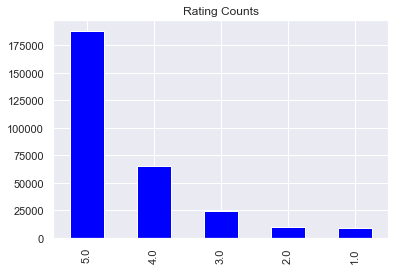

In [4]:
df.overall.value_counts().plot(kind='bar',color='blue',title='Rating Counts')
plt.show()

# Train Test Split

In [5]:
#declare inputs and target
inputs=df[['filtered_review','unixReviewTime','helpfulness_Numerator', 'helpfulness_Denominator','review_len']]
target=df['overall']

In [6]:
from sklearn.model_selection import train_test_split

#train test split dataset 
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=.2, random_state=0)
x_train.head()

,filtered_review,unixReviewTime,helpfulness_Numerator,helpfulness_Denominator,review_len
275333,"['light', 'held', 'glock', 'round', 'protrud',...",1403913600,0,0,44
258272,"['repons', 'effect', 'time', 'excel', 'product...",1350000000,1,2,14
124048,"['wish', 'youtub', 'video', 'advertis', 'knife...",1375401600,1,1,39
107684,"['say', 'amaz', 'product', 'wet', 'put', 'arou...",1312675200,2,2,33
255706,"['let', 'start', 'write', 'great', 'target', '...",1365206400,0,0,43


# Resampling 

In [7]:
from sklearn.utils import resample

In [8]:
# concatenate our training data back together
training  = pd.DataFrame()
training[list(x_train.columns)]=x_train
training['target']=y_train
training.head()

,filtered_review,unixReviewTime,helpfulness_Numerator,helpfulness_Denominator,review_len,target
275333,"['light', 'held', 'glock', 'round', 'protrud',...",1403913600,0,0,44,5.0
258272,"['repons', 'effect', 'time', 'excel', 'product...",1350000000,1,2,14,5.0
124048,"['wish', 'youtub', 'video', 'advertis', 'knife...",1375401600,1,1,39,5.0
107684,"['say', 'amaz', 'product', 'wet', 'put', 'arou...",1312675200,2,2,33,5.0
255706,"['let', 'start', 'write', 'great', 'target', '...",1365206400,0,0,43,4.0


In [9]:
# separate minority and majority classes
rating_1= training[training.target==1.0]
rating_2= training[training.target==2.0]
rating_3= training[training.target==3.0]
rating_4= training[training.target==4.0]
rating_5= training[training.target==5.0]
list_rating_data=[rating_1,rating_2,rating_3,rating_4,rating_5]
# Get a class count to understand the class imbalance.
for i in range(0,5):
    print('rating:{} - review count: '.format(i+1)+ str(len(list_rating_data[i])))


rating:1 - review count: 7241
rating:2 - review count: 8151
rating:3 - review count: 19214
rating:4 - review count: 51790
rating:5 - review count: 150673


In [10]:
# upsample minority
def upsample(minority):
    df= resample(minority,replace=True, # sample with replacement
                  n_samples=len(rating_5), # match number in majority class
                   random_state=23) # reproducible results
    return df

In [11]:
# using the upsamole function to obtain upsampled data 
upsampled_1=upsample(rating_1)
upsampled_2=upsample(rating_2)
upsampled_3=upsample(rating_3)
upsampled_4=upsample(rating_4)

In [12]:
# combine majority and upsampled minority
upsampled= pd.concat([upsampled_1,upsampled_2,upsampled_3,upsampled_4,rating_5])

In [13]:
# check new class counts
upsampled.target.value_counts()

5.0    150673
4.0    150673
1.0    150673
3.0    150673
2.0    150673
Name: target, dtype: int64

In [14]:
# re-declare y_train and x_train
y_train = upsampled.target
x_train = upsampled.drop('target', axis=1)

In [15]:
x_train.head()

,filtered_review,unixReviewTime,helpfulness_Numerator,helpfulness_Denominator,review_len
73216,"['drill', 'hole', 'bigger', 'small', 'poor', '...",1344297600,2,3,13
56495,"['order', 'two', 'time', 'neither', 'realli', ...",1353715200,2,2,90
38199,"['soft', 'foam', 'filler', 'advert', 'airsoft'...",1399852800,1,1,50
101637,"['saw', 'absolut', 'would', 'cut', 'thick', 'l...",1358294400,29,39,52
46888,"['hate', 'product', 'order', 'accid', 'fit', '...",1360540800,0,13,10


# Vectorizing  Text Data

In [16]:
from sklearn.feature_extraction.text import CountVectorizer 
vectorizer=CountVectorizer()

In [17]:
X_trainc=vectorizer.fit_transform(x_train.filtered_review)
X_testc=vectorizer.transform(x_test.filtered_review)

# Naive Bayes Classifier

In [59]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score,make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
f1 = make_scorer(f1_score , average='weighted')

def NB_GridSearch(X_train, y_train):
    grid_params = {'alpha':[0.1,0.2,0.3,0.4,0.5],
                     'fit_prior': [True, False],  }
    
    gs = GridSearchCV( MultinomialNB(), grid_params,scoring=f1)
    gs.fit(X_train, y_train)
    print("Best Score: ", gs.best_score_)
    print("Best Alpha: ", gs.best_params_)

    return gs.best_params_.values()

In [60]:
def NaiveBayes(X_train,y_train,X_test,y_test,alpha,fit_prior):
    # fit the training dataset on the NB classifier
    Naive = MultinomialNB(alpha=0.1, fit_prior= True)
    Naive.fit(X_train,y_train)
    #prediction
    nb_train_pre=Naive.predict(X_train)
    nb_test_pre=Naive.predict(X_test)
    # Use accuracy_score function to get the accuracy
    print("Naive Bayes Train Accuracy Score :",accuracy_score(nb_train_pre, y_train))
    print("Naive Bayes Test Accuracy Score :",accuracy_score(nb_test_pre, y_test))
    # calculate f1 scores for test data and train data 
    nb_f1_score_test=f1_score(y_test,nb_test_pre,average='weighted')
    nb_f1_score_train=f1_score(y_train,nb_train_pre,average='weighted')
    print("Train data f1 score:{}".format(nb_f1_score_train))
    print("Test data f1 score:{}".format(nb_f1_score_test ))
    print("confusion_matrix:{}".format(confusion_matrix(y_test, nb_test_pre)))
    return nb_train_pre,nb_test_pre

In [61]:
# to get best score and best alpha
alpha1,fit_prior1=NB_GridSearch(X_trainc, y_train)

Best Score:  0.6268916465557821
Best Alpha:  {'alpha': 0.1, 'fit_prior': True}


In [62]:
# obtian the results Accuracy Score and 
nb_train_prec,nb_test_prec=NaiveBayes(X_trainc,y_train,X_testc,y_test,alpha1,fit_prior1)

Naive Bayes Train Accuracy Score : 0.6479940002522018
Naive Bayes Test Accuracy Score : 0.5838901262063846
Train data f1 score:0.6451416866551558
Test data f1 score:0.606789049380649
confusion_matrix:[[ 1005   403   192    89   115]
 [  527   589   477   261   199]
 [  566   721  1655  1232   683]
 [  629   704  1932  5270  4484]
 [ 1576  1139  1905  6828 26087]]


# Neural Network

In [23]:
# thanks to :https://realpython.com/python-keras-text-classification/
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

In [24]:
def history_model(X_trainc, y_train,X_testc, y_test):
    #Before we build our model, we need to know the input dimension of our feature vectors.
    input_dim = X_trainc.shape[1] 
    # Add layers one by one in order 
    model = Sequential()
    model.add(keras.layers.Dense(20, input_dim=input_dim, activation='relu', kernel_initializer='he_uniform'))
    model.add(keras.layers.Dense(6, activation='softmax'))
    opt = SGD(lr=0.01, momentum=0.9)
    #specify the optimizer and the loss function.
    model.compile(loss='categorical_crossentropy', 
                  optimizer=opt, 
                  metrics=['accuracy'])

    #Give an overview of the model and the number of parameters available for training:
    model.summary()
    # # fit the model
    history = model.fit(X_trainc, y_train,epochs=50, verbose=1,
                    validation_data=(X_testc, y_test),batch_size=100)
    return history, model

In [25]:
# history, model=history_model(X_trainc, to_categorical(y_train),X_testc, to_categorical(y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                683600    
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
Total params: 683,666
Trainable params: 683,666
Non-trainable params: 0
_________________________________________________________________
Train on 753365 samples, validate on 59268 samples
Epoch 1/50
753365/753365 [==============================] - 358s 475us/step - loss: 1.0461 - accuracy: 0.5716 - val_loss: 1.0974 - val_accuracy: 0.5569
Epoch 2/50
753365/753365 [==============================] - 362s 481us/step - loss: 0.8446 - accuracy: 0.6636 - val_loss: 1.0735 - val_accuracy: 0.5875
Epoch 3/50
753365/753365 [==============================] - 378s 502us/step - loss: 0.7468 - accuracy: 0.7043 - val_loss: 1.1581 - val_accuracy: 0.5641
Epo

753365/753365 [==============================] - 306s 407us/step - loss: 0.3729 - accuracy: 0.8471 - val_loss: 2.1729 - val_accuracy: 0.5845


In [27]:
from sklearn.metrics import confusion_matrix
#prediction
nn_train_pre=model.predict_classes(X_trainc)
nn_test_pre=model.predict_classes(X_testc)

In [85]:
#calculate f1 scores for test data and train data 
nn_f1_score_test=f1_score([int(i) for i in y_test],nn_test_pre,average='weighted')
nn_f1_score_train=f1_score(y_train,nn_train_pre,average='weighted')

In [86]:
print("Train data f1 score:{}".format(nn_f1_score_train))
print("Test data f1 score:{}".format(nn_f1_score_test ))

Train data f1 score:0.8482564474194133
Test data f1 score:0.6085141831165239


In [87]:
print("confusion_matrix:{}".format(confusion_matrix(y_test, nn_test_pre)))

confusion_matrix:[[  742   429   341   131   161]
 [  417   479   671   277   209]
 [  365   635  1921  1282   654]
 [  311   586  2608  5309  4205]
 [  676   846  2936  6883 26194]]


# Random Forest 

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from  sklearn.metrics import make_scorer,precision_score,recall_score,f1_score

In [36]:
# given prameters different values
random_grid={
             'n_estimators':list(range(400,500,10))
#              'max_depth':list(range(1,30,2)),
#              'min_samples_leaf':list(range(1,23,2)),
#              'min_samples_split':list(range(2,21,2))                
             }
# random forest model
rf=RandomForestClassifier(n_jobs=-1,random_state=0)

In [39]:
# Grid searchCV
GS=GridSearchCV(rf,random_grid,cv=5,scoring=f1,verbose=1)

In [41]:
# # fit the train data
# GS.fit(X_trainc,list(y_train)) 

In [ ]:
# obtian best parameters best score
GS.best_score_,GS.best_params_

In [42]:
rfc=RandomForestClassifier(n_estimators=480,
                           max_depth=11, 
                           min_samples_leaf=11,
                           min_samples_split= 2,
                           n_jobs=-1,  random_state=0)

In [43]:
rfc.fit(X_trainc,list(y_train))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=480,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
# Score for train and test data 
print("Score of train data :" ,rfc.score(X_trainc,y_train))
print("Score of test data :" ,rfc.score(X_testc,y_test))

Score of train data : 0.5359566743875811
Score of test data : 0.6153404872781265


In [45]:
# prediction
rf_train_pre=rfc.predict(X_trainc)
rf_test_pre=rfc.predict(X_testc)
f1_score_test=f1_score(list(y_test),rf_test_pre,average='weighted')

In [46]:
print("F1 Score of test data :" ,f1_score_test)

F1 Score of test data : 0.6186662277709427


# Model Stacking

Having now obtained the first-level predictions, one can think of it as essentially building a new set of features to be used as training data for the next classifier. As per the code below, we are therefore having as our new columns the first-level predictions from our earlier classifiers and we train the next classifier on this.

In [54]:
# combine all the outputs together as new features 

X_train = pd.DataFrame( {
    
     'Naive_Bayes': nb_train_prec.ravel(),
     'Neural_Network': nn_train_pre.ravel(),
     'Random_Forest2': rf_train_pre.ravel(),
                                        
    })

X_test = pd.DataFrame( {
    
     'Naive_Bayes': nb_test_prec.ravel(),
     'Neural_Network': nn_test_pre.ravel(),
     'Random_Forest2': rf_test_pre.ravel(),
                                        
    })

X_train.head()

,Naive_Bayes,Neural_Network,Random_Forest2
0,1.0,1,1.0
1,1.0,1,1.0
2,1.0,1,1.0
3,1.0,1,1.0
4,1.0,1,1.0


# XGboost

In [94]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# given prameters different values
RS={
             'n_estimators':list(range(100,500,10)),
                'max_depth':list(range(1,30,2)),
               'max_features':[1,2,3],
#              'min_samples_leaf':list(range(1,23,2)),
#               'min_samples_split':list(range(2,21,2))                
             }
gbm=xgb.XGBClassifier(
                        n_jobs=-1,  
                        random_state=0)
# randommized searchCV
rs=RandomizedSearchCV(gbm,RS,cv=5,scoring=f1,verbose=3)

In [95]:
# fit the train data
rs.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, max_features=1, max_depth=3 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_features=1, max_depth=3, score=0.850, total= 2.0min
[CV] n_estimators=200, max_features=1, max_depth=3 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.0min remaining:    0.0s


[CV]  n_estimators=200, max_features=1, max_depth=3, score=0.852, total= 1.9min
[CV] n_estimators=200, max_features=1, max_depth=3 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.8min remaining:    0.0s


[CV]  n_estimators=200, max_features=1, max_depth=3, score=0.851, total= 1.8min
[CV] n_estimators=200, max_features=1, max_depth=3 ...................
[CV]  n_estimators=200, max_features=1, max_depth=3, score=0.852, total= 1.8min
[CV] n_estimators=200, max_features=1, max_depth=3 ...................
[CV]  n_estimators=200, max_features=1, max_depth=3, score=0.850, total= 1.8min
[CV] n_estimators=210, max_features=1, max_depth=3 ...................
[CV]  n_estimators=210, max_features=1, max_depth=3, score=0.850, total= 2.0min
[CV] n_estimators=210, max_features=1, max_depth=3 ...................
[CV]  n_estimators=210, max_features=1, max_depth=3, score=0.852, total= 2.0min
[CV] n_estimators=210, max_features=1, max_depth=3 ...................
[CV]  n_estimators=210, max_features=1, max_depth=3, score=0.851, total= 1.9min
[CV] n_estimators=210, max_features=1, max_depth=3 ...................
[CV]  n_estimators=210, max_features=1, max_depth=3, score=0.852, total= 2.1min
[CV] n_estimat

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 251.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                  

In [96]:
# obtian best parameters best score
rs.best_score_,rs.best_params_

(0.8510033841350996, {'n_estimators': 200, 'max_features': 1, 'max_depth': 3})

In [104]:
GBM = xgb.XGBClassifier(max_features= 1,
                        n_estimators=200,
                        max_depth=3,
                        n_jobs=-1,  
                        random_state=0)
# fit the model 
GBM.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4, max_features=1,
              min_child_weight=1, missing=None, n_estimators=195, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [105]:
#predictions
train_pre=GBM.predict(X_train)
test_pre=GBM.predict(X_test)
# obtian f1 score
f1_score_train=f1_score(list(y_train),train_pre,average="weighted")
f1_score_test=f1_score(list(y_test),test_pre,average="weighted")
# Score for train and test data 
print("F1 Score of train data :" , f1_score_train)
print("F1 Score of test data :" ,f1_score_test)

F1 Score of train data : 0.851056849332589
F1 Score of test data : 0.5893644055870956


Confusion matrix, without normalization
[[  742   429   341   136   156]
 [  417   479   671   288   198]
 [  365   635  1921  1386   550]
 [  311   586  2608  6040  3474]
 [  676   846  2936  9151 23926]]
Normalized confusion matrix
[[0.4113082  0.23780488 0.18902439 0.07538803 0.0864745 ]
 [0.20311739 0.2333171  0.32683877 0.14028251 0.09644423]
 [0.07514927 0.13073914 0.39551163 0.28536133 0.11323862]
 [0.02388816 0.04501114 0.20032261 0.46393732 0.26684077]
 [0.01800986 0.02253896 0.07822033 0.24379912 0.63743173]]


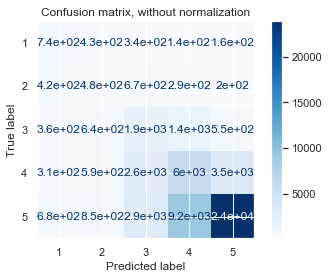

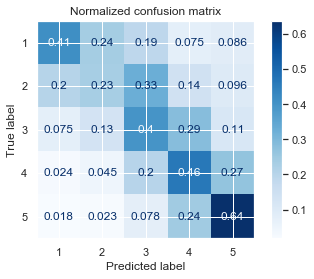

In [162]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(GBM,X_test,y_test,
                                 display_labels=[1,2,3,4,5],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)

    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

# Neural Network

In [168]:
def history_model(X_train, y_train,X_test, y_test):
    #Before we build our model, we need to know the input dimension of our feature vectors.
    input_dim = X_train.shape[1] 
    # Add layers one by one in order 
    model = Sequential()
    model.add(keras.layers.Dense(20, input_dim=input_dim, activation='relu'))
    model.add(keras.layers.Dense(6, activation='softmax'))
    #specify the optimizer and the loss function.
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])

    #Give an overview of the model and the number of parameters available for training:
    model.summary()
    # # fit the model
    history = model.fit(X_train, y_train,epochs=60, verbose=1,
                    validation_data=(X_test, y_test),batch_size=70)
    return history, model

In [169]:
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [170]:
history1, model1=history_model(X_train,Y_train,X_test, Y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                80        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 126       
Total params: 206
Trainable params: 206
Non-trainable params: 0
_________________________________________________________________
Train on 753365 samples, validate on 59268 samples
Epoch 1/60
753365/753365 [==============================] - 15s 20us/step - loss: 0.6579 - accuracy: 0.8034 - val_loss: 1.7867 - val_accuracy: 0.5819
Epoch 2/60
753365/753365 [==============================] - 15s 20us/step - loss: 0.5098 - accuracy: 0.8481 - val_loss: 1.6499 - val_accuracy: 0.5519
Epoch 3/60
753365/753365 [==============================] - 16s 21us/step - loss: 0.4633 - accuracy: 0.8507 - val_loss: 1.4373 - val_accuracy: 0.5745
Epoch 4/60
753365

Epoch 51/60
753365/753365 [==============================] - 14s 19us/step - loss: 0.4233 - accuracy: 0.8514 - val_loss: 1.3134 - val_accuracy: 0.5991
Epoch 52/60
753365/753365 [==============================] - 14s 19us/step - loss: 0.4232 - accuracy: 0.8513 - val_loss: 1.3254 - val_accuracy: 0.5556
Epoch 53/60
753365/753365 [==============================] - 14s 19us/step - loss: 0.4232 - accuracy: 0.8515 - val_loss: 1.3458 - val_accuracy: 0.5556
Epoch 54/60
753365/753365 [==============================] - 14s 19us/step - loss: 0.4231 - accuracy: 0.8517 - val_loss: 1.2998 - val_accuracy: 0.5770
Epoch 55/60
753365/753365 [==============================] - 15s 20us/step - loss: 0.4230 - accuracy: 0.8515 - val_loss: 1.3024 - val_accuracy: 0.5762
Epoch 56/60
753365/753365 [==============================] - 14s 19us/step - loss: 0.4231 - accuracy: 0.8518 - val_loss: 1.3415 - val_accuracy: 0.5508
Epoch 57/60
753365/753365 [==============================] - 14s 19us/step - loss: 0.4232 - ac

In [171]:
#prediction
train_pre_nn=model1.predict_classes(X_train)
test_pre_nn=model1.predict_classes(X_test)

In [172]:
#calculate f1 scores for test data and train data 
f1_score_test_nn=f1_score([int(i) for i in y_test],test_pre_nn,average='weighted')
f1_score_train_nn=f1_score(y_train,train_pre_nn,average='weighted')

In [173]:
print("Train data f1 score:{}".format(f1_score_train_nn))
print("Test data f1 score:{}".format(f1_score_test_nn ))

Train data f1 score:0.847333310294204
Test data f1 score:0.6189316561286361


In [174]:
print("confusion_matrix:{}".format(confusion_matrix(y_test, test_pre_nn)))

confusion_matrix:[[  742   429   341   126   166]
 [  417   479   671   265   221]
 [  365   635  1921  1267   669]
 [  311   586  2608  5110  4404]
 [  676   846  2936  5879 27198]]
